        date  USGG10YR/SP500  USGG10YR/DXY  USGG10YR/WTI  USGG10YR/GOLD  \
0 1995-05-30        3.233733     20.779550     90.155364       4.392004   
1 1995-05-31        3.170872     20.483748     89.536426       4.401101   
2 1995-06-01        3.211238     20.755554     90.643567       4.449197   
3 1995-06-02        3.267828     21.085071     90.916975       4.536368   
4 1995-06-03        3.267828     21.085071     90.916975       4.536368   

   USGG10YR/KRW  USGG10YR/NICKEL  SP500/USGG10YR  SP500/DXY  SP500/WTI  ...  \
0      2.228080         0.224820        0.309240   6.425871  27.879659  ...   
1      2.231618         0.224913        0.315371   6.459973  28.237163  ...   
2      2.253273         0.226011        0.311406   6.463412  28.226984  ...   
3      2.284562         0.223929        0.306014   6.452320  27.821839  ...   
4      2.284562         0.223929        0.306014   6.452320  27.821839  ...   

    KRW/DXY    KRW/WTI  KRW/GOLD  KRW/NICKEL  NICKEL/USGG10YR  NICKEL/SP50

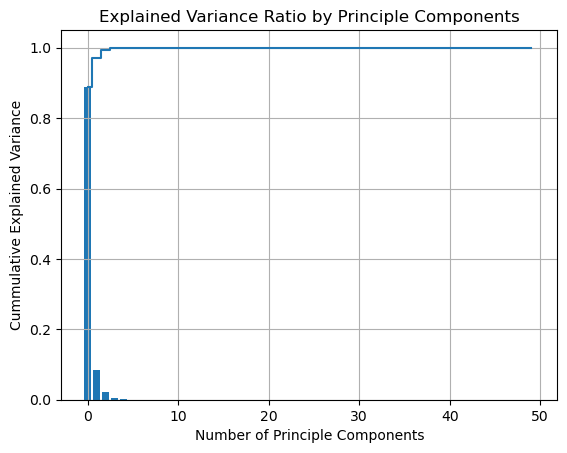

                 0            1            2           3           4  \
0     -6744.366334 -1937.250309  -751.577869  -62.442011   50.458459   
1     -6763.358714 -1977.491999  -740.106956  -62.138549   52.324984   
2     -6573.282795 -1974.965770  -752.090432  -63.990104   42.568266   
3     -6572.812690 -1975.211591  -752.330297  -56.078119   43.516215   
4     -6572.130516 -1975.584247  -752.673651  -44.600642   44.900670   
...            ...          ...          ...         ...         ...   
10938   719.283774    47.635090  4701.690710 -376.951955  692.198935   
10939   645.439295    69.361232  4710.758316 -380.049873  705.212135   
10940   538.677198    82.821339  4744.252436 -375.795497  693.566861   
10941   538.968405    77.217620  4751.172934 -375.285757  706.204550   
10942   538.844164    77.147896  4750.340388 -378.849619  705.057687   

               5           6           7          8          9  ...        41  \
0     -99.627730 -350.842984  152.745015 -21.756860   

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
8 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/pipeline.py", line 473, in fit
    self._final_estimator.

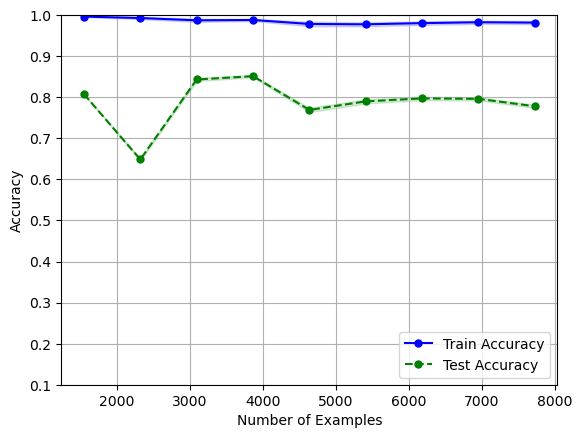

2025-07-13 니켈 급락/정상/급등 확률:[[0. 1. 0.]]


In [ ]:
import pandas as pd

url='http://10.1.13.178:5000/xbbg/USGG10YR/'
df1=pd.read_csv(url)

url='http://10.1.13.178:5000/xbbg/SP500/'
df2=pd.read_csv(url)

url='http://10.1.13.178:5000/xbbg/DXY/'
df3=pd.read_csv(url)

url='http://10.1.13.178:5000/xbbg/WTI/'
df4=pd.read_csv(url)

url='http://10.1.13.178:5000/xbbg/GOLD/'
df5=pd.read_csv(url)

url='http://10.1.13.178:5000/ecos/KRW/'
df6=pd.read_csv(url)

url='http://10.1.13.178:5000/xbbg/NICKEL/'
df7=pd.read_csv(url)

from functools import reduce

dfs=[df1,df2,df3,df4,df5,df6,df7]

new_col=['USGG10YR', 'SP500','DXY', 'WTI', 'GOLD','KRW','NICKEL']

for i, df in enumerate(dfs):
    df.rename(columns={'value':new_col[i]}, inplace=True)
    df.drop(columns=['item'], inplace=True) 

date_range=pd.date_range(start='1995-05-30', end=max(df['date'].max() for df in dfs), freq='d')
base_df=pd.DataFrame({'date':date_range})

for df in dfs:
    df['date']=pd.to_datetime(df['date'])

merged_df = base_df.copy()

for df in dfs:
    merged_df = merged_df.merge(df, on="date", how="left")

merged_df.ffill(inplace=True)

merged_df['USGG10YR']=100/(merged_df['USGG10YR']/100)+100


dff=pd.DataFrame(merged_df)

def calculate_relative_prices(dff1):
    series = ['USGG10YR', 'SP500', 'DXY', 'WTI', 'GOLD', 'KRW', 'NICKEL']
    relative_prices=pd.DataFrame({'date':dff['date']})

    for col1 in series:
        for col2 in series:
            if col1 != col2:
                relative_prices[f'{col1}/{col2}']=dff[col1]/ dff[col2]
    
    return relative_prices

relative_prices_df=calculate_relative_prices(dff)

print(relative_prices_df.head())

dff_rel=pd.DataFrame(relative_prices_df)

print(dff_rel)

def calculate_rolling_std(dff):
    series = ['USGG10YR', 'SP500', 'DXY', 'WTI', 'GOLD', 'KRW', 'NICKEL']
    rolling_std_df = pd.DataFrame({'date': dff['date']})  

    for col in series:
        rolling_std_df[f'{col}_30d_std'] = dff[col].rolling(window=30).std()

    return rolling_std_df

rolling_std_df = calculate_rolling_std(dff)

print(rolling_std_df)

dff_std=pd.DataFrame(rolling_std_df)

print(dff_std)

def calculate_rolling_corr(dff):
    series = ['USGG10YR', 'SP500', 'DXY', 'WTI', 'GOLD', 'KRW', 'NICKEL']
    rolling_corr_df = pd.DataFrame({'date': dff['date']})  

    for col1 in series:
        for col2 in series:
            if col1 != col2:
                rolling_corr_df[f'{col1}/{col2}_30d_corr'] = (
                    dff[col1].rolling(window=30).corr(dff[col2])
                )

    return rolling_corr_df

rolling_corr_df = calculate_rolling_corr(dff)

print(rolling_corr_df)

dff_corr=pd.DataFrame(rolling_corr_df)

print(dff_corr)

dff=dff.copy()

dff=dff.merge(dff_rel, on='date', how='left')
dff=dff.merge(dff_std, on='date', how='left')
dff=dff.merge(dff_corr, on='date', how='left')

dff=dff.dropna()

print(dff)

import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_scale=dff.drop(columns=['date'])

pca=PCA(n_components=50)
X_pca=pca.fit_transform(X_scale)

explained_variance_ratio=pca.explained_variance_ratio_
cum_var_exp=np.cumsum(explained_variance_ratio)

num_components=len(explained_variance_ratio)

import matplotlib.pyplot as plt

plt.bar(range(num_components), explained_variance_ratio,align='center' , label='Individual Explained Ratio')
plt.step(range(num_components), cum_var_exp,where='mid',label='Cummulative Explained Variance')

plt.xlabel('Number of Principle Components')
plt.ylabel('Cummulative Explained Variance')
plt.title('Explained Variance Ratio by Principle Components')

plt.grid()
plt.show()

dfx=pd.DataFrame(X_pca)
dfx['date']=dff['date']
print(dfx)

def calculate_yoy(dff):
    series = ['KRW', 'NICKEL']
    yoy_df = pd.DataFrame({'date': dff['date']})  

    for col in series:
        yoy_df[f'{col}_yoy']=dff[col]/dff[col].shift(365)-1

    return yoy_df

yoy_df = calculate_yoy(dff)

print(yoy_df)

dff_yoy=pd.DataFrame(yoy_df)

print(dff_yoy)

dff_yoy=dff_yoy.dropna()
dff_yoy = dff_yoy.reset_index(drop=True) 

print(dff_yoy)


dff_yoy['KRW_yoy'] = dff_yoy['KRW_yoy'].shift(-30) 
dff_yoy['NICKEL_yoy'] = dff_yoy['NICKEL_yoy'].shift(-30)

print(dff_yoy)

dff_yoy=dff_yoy.dropna()

print(dff_yoy)


dff=dff_yoy.copy()

dff=dff_yoy.merge(dfx, on='date', how='left')

dff.dropna()

print(dff)

percentile =np.percentile(dff_yoy['NICKEL_yoy'].abs(),[10,90])
dff_yoy['y2']=pd.cut(dff['NICKEL_yoy'], bins=[-np.inf, -percentile[1], percentile[1], np.inf], labels=[-1,0,1])

print(dff_yoy)

print(dff_yoy['y2'].value_counts())

dfxy = dfx.merge(dff_yoy[['date', 'y2']], on='date', how='left')

dfxy=dfxy.dropna()
print(dfxy)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score


train_data=dfxy[(dfxy['date']>='1996-05-28')& (dfxy['date']<='2019-12-31')]
test_data=dfxy[dfxy['date']>='2020-01-01']

X_train=train_data.drop(columns=['date','y2'])
y_train=train_data['y2']

X_test=test_data.drop(columns=['date','y2'])
y_test=test_data['y2']

model=RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

y_pred=model.predict(X_test)

accuracy_score=accuracy_score(y_pred, y_test)
print(accuracy_score)

pipe_lr=make_pipeline(StandardScaler(), LogisticRegression(penalty='l2', max_iter=5000))
train_sizes, train_scores, test_scores=learning_curve(estimator=pipe_lr, X=X_train, y=y_train, train_sizes=np.linspace(0.1,1.0,10), cv=10, n_jobs=1)

train_mean=np.mean(train_scores, axis=1)
train_std=np.std(train_scores, axis=1)
test_mean=np.mean(test_scores, axis=1)
test_std=np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Train Accuracy')
plt.fill_between(train_sizes, train_mean+train_std, train_mean-train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='o', markersize=5, label='Test Accuracy')
plt.fill_between(train_sizes, test_mean+train_std, test_mean-train_std, alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of Examples')
plt.ylabel('Accuracy')

plt.legend(loc='lower right')
plt.ylim([0.1,1.00])

plt.show()


X_new_train=np.concatenate([X_train, X_test], axis=0)
y_new_train=np.concatenate([y_train, y_test], axis=0)

model_new=RandomForestClassifier(n_estimators=100)
model_new.fit(X_new_train, y_new_train)

X_new_pred = dfx.iloc[[-1]].drop(columns=['date']) 
nic_y_new_pred=model_new.predict_proba(X_new_pred)

print(f'2025-07-13 니켈 급락/정상/급등 확률:{y_new_pred}')


In [13]:
pd.DataFrame(nic_y_new_pred).to_csv("nic_y_new_pred.csv")